### Import Libraries

In [12]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

### Read the CSV dataset File

In [13]:
df = pd.read_csv('../data/raw/t20i_Matches_Data.csv')

In [14]:
display(df.head())

,T20I Match No,Match ID,Match Name,Series ID,Series Name,Match Date,Match Format,Team1 ID,Team1 Name,Team1 Captain,...,Umpire 2,Match Referee,Toss Winner,Toss Winner Choice,Match Winner,Match Result Text,MOM Player,Team1 Playing 11,Team2 Playing 11,Debut Players
0,52,291356,Australia Vs India Only T20I,291355,India tour of Australia - 2007 (2007/08),2008-02-01,T20,6,India,7593,...,SJA Taufel,JJ Crowe,India,bat,Australia,Australia won by 9 wickets (with 52 balls rema...,8876.0,"['7773', '7781', '8813', '8742', '48405', '759...","['4176', '8876', '6253', '6256', '4382', '1198...","['11984', '49327', '48319']"
1,54,300436,New Zealand Vs England 2Nd T20I,300418,England tour of New Zealand - 2008 (2007/08),2008-02-07,T20,1,England,2314,...,GAV Baxter,AG Hurst,England,bat,England,England won by 50 runs,2314.0,"['11556', '44660', '8107', '7822', '2314', '63...","['44946', '10384', '44930', '10381', '9570', '...","['47488', '10325']"
2,65,361531,Netherlands Vs Scotland 2Nd Semi Final,353665,"ICC World Twenty20 Qualifier Bermuda, Canada, ...",2008-08-04,T20,30,Scotland,45548,...,PK Baldwin,BC Broad,Netherlands,bowl,Netherlands,Netherlands won by 5 wickets (with 12 balls re...,45358.0,"['45548', '46048', '46142', '8221', '4334', '4...","['10323', '48655', '6362', '49443', '45358', '...",[]
3,66,354459,Kenya Vs Scotland 3Rd Place Playoff,353665,"ICC World Twenty20 Qualifier Bermuda, Canada, ...",2008-08-04,T20,26,Kenya,2265,...,PK Baldwin,BC Broad,Kenya,bat,Scotland,Scotland won by 9 wickets (with 11 balls remai...,45548.0,"['10364', '2264', '49383', '2265', '2268', '50...","['45548', '46048', '46142', '8221', '4334', '4...","['50293', '50293']"
4,69,361653,Sri Lanka Vs Zimbabwe 1St Match,361644,T20 Canada in Canada - 2008 (2008/09),2008-10-10,T20,9,Zimbabwe,45326,...,MR Benson,JJ Crowe,Sri Lanka,bowl,Sri Lanka,Sri Lanka won by 5 wickets (with 6 balls remai...,50377.0,"['10639', '10423', '47619', '10421', '21364', ...","['48468', '7419', '15273', '8195', '6315', '48...","['50377', '47210', '12209', '15273', '48468', ..."


In [15]:
# Define categorical columns
categorical_cols = [
    'Team1 Name','Team2 Name','Match Venue (Stadium)',
    'Match Venue (City)','Match Venue (Country)',
    'Toss Winner','Match Winner'
]

### Label Encode - Team names ans Match Venues

In [16]:
# Dictionary to store encoders and mappings
encoders = {}
mappings = {}

# Apply Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [17]:
# If you want all mappings printed:
for col, mapping in mappings.items():
    print(f"\n{col} Mapping:")
    print(mapping)


Team1 Name Mapping:
{'Afghanistan': np.int64(0), 'Argentina': np.int64(1), 'Australia': np.int64(2), 'Austria': np.int64(3), 'Bahamas': np.int64(4), 'Bahrain': np.int64(5), 'Bangladesh': np.int64(6), 'Belgium': np.int64(7), 'Belize': np.int64(8), 'Bermuda': np.int64(9), 'Bhutan': np.int64(10), 'Botswana': np.int64(11), 'Brazil': np.int64(12), 'Bulgaria': np.int64(13), 'Cambodia': np.int64(14), 'Cameroon': np.int64(15), 'Canada': np.int64(16), 'Cayman Is': np.int64(17), 'Chile': np.int64(18), 'China': np.int64(19), 'Cook Islands': np.int64(20), 'Costa Rica': np.int64(21), 'Croatia': np.int64(22), 'Cyprus': np.int64(23), 'Czech Rep.': np.int64(24), 'Denmark': np.int64(25), 'England': np.int64(26), 'Estonia': np.int64(27), 'Eswatini': np.int64(28), 'Fiji': np.int64(29), 'Finland': np.int64(30), 'France': np.int64(31), 'Gambia': np.int64(32), 'Germany': np.int64(33), 'Ghana': np.int64(34), 'Gibraltar': np.int64(35), 'Greece': np.int64(36), 'Guernsey': np.int64(37), 'Hong Kong': np.int64(3

In [18]:
display(df.head())

,T20I Match No,Match ID,Match Name,Series ID,Series Name,Match Date,Match Format,Team1 ID,Team1 Name,Team1 Captain,...,Umpire 2,Match Referee,Toss Winner,Toss Winner Choice,Match Winner,Match Result Text,MOM Player,Team1 Playing 11,Team2 Playing 11,Debut Players
0,52,291356,Australia Vs India Only T20I,291355,India tour of Australia - 2007 (2007/08),2008-02-01,T20,6,40,7593,...,SJA Taufel,JJ Crowe,41,bat,2,Australia won by 9 wickets (with 52 balls rema...,8876.0,"['7773', '7781', '8813', '8742', '48405', '759...","['4176', '8876', '6253', '6256', '4382', '1198...","['11984', '49327', '48319']"
1,54,300436,New Zealand Vs England 2Nd T20I,300418,England tour of New Zealand - 2008 (2007/08),2008-02-07,T20,1,26,2314,...,GAV Baxter,AG Hurst,26,bat,26,England won by 50 runs,2314.0,"['11556', '44660', '8107', '7822', '2314', '63...","['44946', '10384', '44930', '10381', '9570', '...","['47488', '10325']"
2,65,361531,Netherlands Vs Scotland 2Nd Semi Final,353665,"ICC World Twenty20 Qualifier Bermuda, Canada, ...",2008-08-04,T20,30,80,45548,...,PK Baldwin,BC Broad,64,bowl,61,Netherlands won by 5 wickets (with 12 balls re...,45358.0,"['45548', '46048', '46142', '8221', '4334', '4...","['10323', '48655', '6362', '49443', '45358', '...",[]
3,66,354459,Kenya Vs Scotland 3Rd Place Playoff,353665,"ICC World Twenty20 Qualifier Bermuda, Canada, ...",2008-08-04,T20,26,49,2265,...,PK Baldwin,BC Broad,49,bat,77,Scotland won by 9 wickets (with 11 balls remai...,45548.0,"['10364', '2264', '49383', '2265', '2268', '50...","['45548', '46048', '46142', '8221', '4334', '4...","['50293', '50293']"
4,69,361653,Sri Lanka Vs Zimbabwe 1St Match,361644,T20 Canada in Canada - 2008 (2008/09),2008-10-10,T20,9,102,45326,...,MR Benson,JJ Crowe,89,bowl,84,Sri Lanka won by 5 wickets (with 6 balls remai...,50377.0,"['10639', '10423', '47619', '10421', '21364', ...","['48468', '7419', '15273', '8195', '6315', '48...","['50377', '47210', '12209', '15273', '48468', ..."


### One-Hot Encode - Toss winner choice

In [19]:
# One-Hot Encode Toss Winner Choice
df = pd.get_dummies(df, columns=['Toss Winner Choice'], drop_first=False)

# Save mapping for Toss Winner Choice (manually from the columns)
mappings['Toss Winner Choice'] = list(df.filter(like='Toss Winner Choice_').columns)

In [20]:
# --- Display Results ---

# Show first few rows
print(df.head())

# Print mappings
for col, mapping in mappings.items():
    print(f"\n{col} Mapping:")
    print(mapping)

# Example: reverse lookup for Match Winner
print("\nDecode numbers back to names (Match Winner):")
print(encoders['Match Winner'].inverse_transform([0,1,2,3]))

   T20I Match No  Match ID                              Match Name  Series ID  \
0             52    291356            Australia Vs India Only T20I     291355   
1             54    300436         New Zealand Vs England 2Nd T20I     300418   
2             65    361531  Netherlands Vs Scotland 2Nd Semi Final     353665   
3             66    354459     Kenya Vs Scotland 3Rd Place Playoff     353665   
4             69    361653         Sri Lanka Vs Zimbabwe 1St Match     361644   

                                         Series Name  Match Date Match Format  \
0          India tour of Australia  - 2007 (2007/08)  2008-02-01          T20   
1      England tour of New Zealand  - 2008 (2007/08)  2008-02-07          T20   
2  ICC World Twenty20 Qualifier Bermuda, Canada, ...  2008-08-04          T20   
3  ICC World Twenty20 Qualifier Bermuda, Canada, ...  2008-08-04          T20   
4              T20 Canada in Canada - 2008 (2008/09)  2008-10-10          T20   

   Team1 ID  Team1 Name  T

### Write cleaned data into CSV file

In [21]:
# Write processed dataset back to the same file
df.to_csv("t20i_Matches_Data.csv", index=False)
print("Encoded dataset saved successfully ✅")

Encoded dataset saved successfully ✅


## Visualization of One-hot Encoded columns


Visualizing One-Hot Encoded Toss Choice Columns...


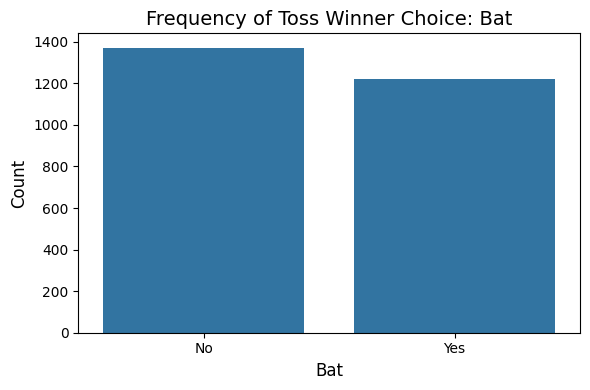

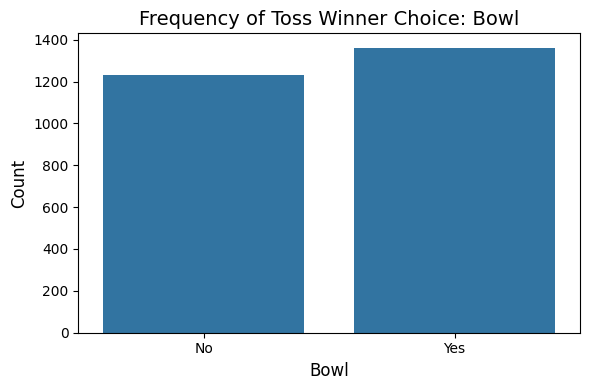

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1. Perform One-Hot Encoding (The step that was missing)
# -----------------------------

# NOTE: You must use the actual column name from your raw data 
# that contains the values 'bat', 'bowl', 'match called off', etc.
# We will assume this column is called 'Toss Winner Choice'.

if 'Toss Winner Choice' in df.columns:
    # Use get_dummies to create the one-hot encoded columns (e.g., Toss Winner Choice_bat)
    # The prefix ensures the new columns match the names you requested for visualization.
    df = pd.get_dummies(df, columns=['Toss Winner Choice'], prefix='Toss Winner Choice')
    print("✅ One-Hot Encoding applied successfully. New columns created.")


# -----------------------------
# 2. Visualization (Your original request, now runnable)
# -----------------------------

ENCODED_COLS_TO_VISUALIZE = [
    'Toss Winner Choice_bat', 
    'Toss Winner Choice_bowl', 
    'Toss Winner Choice_match called off'
]

print("\nVisualizing One-Hot Encoded Toss Choice Columns...")

for col in ENCODED_COLS_TO_VISUALIZE:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        
        # Countplot is ideal for visualizing the frequency of 0s and 1s
        sns.countplot(x=df[col])
        
        # Customize labels and title
        # Replace 'Toss Winner Choice_' for cleaner plot titles
        clean_title = col.replace('Toss Winner Choice_', '').title()
        
        plt.title(f'Frequency of Toss Winner Choice: {clean_title}', fontsize=14)
        plt.xlabel(clean_title, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks([0, 1], ['No', 'Yes'])
        plt.tight_layout()
        plt.show()
    else:
        print(f"Warning: Column '{col}' is still missing after attempting One-Hot Encoding. Check the original column names.")

### Write Mapping data of Encoded data into JSON file

In [ ]:
import json

# Convert numpy.int64 -> Python int
clean_mappings = {}
for col, mapping in mappings.items():
    if isinstance(mapping, dict):
        clean_mappings[col] = {str(k): int(v) for k, v in mapping.items()}
    else:
        # For Toss Winner Choice (list of strings from One-Hot Encoding)
        clean_mappings[col] = [str(v) for v in mapping]

# Save as JSON
with open("../results/logs/categorical_mappings.json", "w") as f:
    json.dump(clean_mappings, f, indent=4)

print("Mappings saved to categorical_mappings.json ✅")



Mappings saved to categorical_mappings.json ✅
